# Laboratorio 6

### Javier Valle 20159
### Mario de León 19019

# Problema 1

#### Imports necesarios.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

### Inciso 2: Cargue los archivos de datos a R o a Python.

In [2]:
df = pd.read_csv('traficogt.csv')

print("Dataframe: ", df)

Dataframe:         Unnamed: 0                   id               id_str  \
0               0  1701654244858679742  1701654244858679742   
1               1  1701651855212691764  1701651855212691764   
2               2  1701348453916311903  1701348453916311903   
3               3  1701995859229958189  1701995859229958189   
4               4  1701216420997017888  1701216420997017888   
...           ...                  ...                  ...   
12626       12626  1237533600368562176  1237533600368562176   
12627       12627  1237513419122593794  1237513419122593794   
12628       12628  1237443272445960197  1237443272445960197   
12629       12629  1237356194957754368  1237356194957754368   
12630       12630  1237351427992928256  1237351427992928256   

                                                     url  \
0      https://twitter.com/EmisorasUnidas/status/1701...   
1      https://twitter.com/amilcarmontejo/status/1701...   
2      https://twitter.com/edgarduarteagui/status/1

### Inciso 3: Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.

#### Convirtiedo de mayúsculas a minúsculas en el dataset.

In [3]:
df = df.apply(lambda x: x.astype(str).str.lower())

print(df)

df.to_csv('nuevo_traficogt.csv', index=False)

      Unnamed: 0                   id               id_str  \
0              0  1701654244858679742  1701654244858679742   
1              1  1701651855212691764  1701651855212691764   
2              2  1701348453916311903  1701348453916311903   
3              3  1701995859229958189  1701995859229958189   
4              4  1701216420997017888  1701216420997017888   
...          ...                  ...                  ...   
12626      12626  1237533600368562176  1237533600368562176   
12627      12627  1237513419122593794  1237513419122593794   
12628      12628  1237443272445960197  1237443272445960197   
12629      12629  1237356194957754368  1237356194957754368   
12630      12630  1237351427992928256  1237351427992928256   

                                                     url  \
0      https://twitter.com/emisorasunidas/status/1701...   
1      https://twitter.com/amilcarmontejo/status/1701...   
2      https://twitter.com/edgarduarteagui/status/170...   
3      https://

[12631 rows x 29 columns]


#### Quintando los caracteres especiales del dataset.

In [4]:
def quitar_caracteres_especiales(texto):
    # Utilizamos el método str.replace() para reemplazar los caracteres por espacios en blanco
    texto = texto.replace('#', ' ').replace('@', ' ').replace("'", ' ')
    return texto

# Aplicamos la función a todas las columnas del DataFrame
df = df.applymap(quitar_caracteres_especiales)

# Guardando el DataFrame en un archivo CSV
df.to_csv('nuevo_traficogt.csv', index=False)

### Quitando los signos de puntuación.

In [5]:
def quitar_puntuacion(texto):
    # Utilizamos una expresión regular para eliminar signos de puntuación
    return re.sub(r'[^\w\s]', '', texto)

df = df.applymap(quitar_puntuacion)

# Guardando el DataFrame en un archivo CSV
df.to_csv('nuevo_traficogt.csv', index=False)

### Quitando los artículos, preposiciones y conjunciones (stopwords)

In [6]:
# Descargando los stopwords en caso de que no estén disponibles.
nltk.download('stopwords')

# Obteniendo los stopwords en español
stop_words = set(stopwords.words('spanish'))

# Creando una función para eliminar los stopwords.
def quitar_stopwords(texto):
    palabras = texto.split()  # Divide el texto en palabras
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]
    return ' '.join(palabras_filtradas)  # Une las palabras filtradas en un solo texto

# Aplicando la función a todas las columnas del DataFrame
df = df.applymap(quitar_stopwords)

# Guardando el DataFrame en un archivo CSV
df.to_csv('nuevo_traficogt.csv', index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Problema 2

### Ejercicio 3: Limpieza

In [7]:
# Importando la biblioteca pandas
import pandas as pd

# Cargando los archivos de datos
df_sandra = pd.read_csv('sandraTorres.csv')
df_bernardo = pd.read_csv('bernardoArevalo.csv')

# Mostrando las primeras filas de cada dataframe para tener una vision general
df_sandra_head = df_sandra.head()
df_bernardo_head = df_bernardo.head()

df_sandra_head, df_bernardo_head

(   Unnamed: 0                   id               id_str  \
 0           0  1701686249797345422  1701686249797345422   
 1           1  1701686065361215632  1701686065361215632   
 2           2  1701176209076609121  1701176209076609121   
 3           3  1701684889081307215  1701684889081307215   
 4           4  1701684719815970972  1701684719815970972   
 
                                                  url  \
 0  https://twitter.com/Yeya16155804/status/170168...   
 1  https://twitter.com/Palomin17772524/status/170...   
 2  https://twitter.com/iRizhao/status/17011762090...   
 3  https://twitter.com/_awskl/status/170168488908...   
 4  https://twitter.com/Mr_andrew89/status/1701684...   
 
                         date  \
 0  2023-09-12 19:56:32+00:00   
 1  2023-09-12 19:55:48+00:00   
 2  2023-09-11 10:09:49+00:00   
 3  2023-09-12 19:51:07+00:00   
 4  2023-09-12 19:50:27+00:00   
 
                                                 user lang  \
 0  {'id': 1213902343311245313, 

In [8]:
# Importando las bibliotecas necesarias para el preprocesamiento
import re
from nltk.corpus import stopwords

# Definiendo la funcion para preprocesar el contenido
def preprocess_content(text):
    # Convertir el texto a minusculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    # Eliminar caracteres especiales y números
    text = re.sub(r'[@#]\w+', '', text)  # eliminar menciones y hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # eliminar puntuaciones y numeros
    # Eliminar palabras comunes (stopwords)
    stop_words = set(stopwords.words('spanish'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    return text

# Aplicar la funcion de preprocesamiento a la columna 'rawContent' para ambos dataframes
df_sandra['processedContent'] = df_sandra['rawContent'].apply(preprocess_content)
df_bernardo['processedContent'] = df_bernardo['rawContent'].apply(preprocess_content)

# Mostrar las primeras filas del contenido preprocesado para cada dataframe
df_sandra_processed_head = df_sandra[['rawContent', 'processedContent']].head()
df_bernardo_processed_head = df_bernardo[['rawContent', 'processedContent']].head()

df_sandra_processed_head, df_bernardo_processed_head

(                                          rawContent  \
 0  @bernardosilvagt @BArevalodeLeon @DrGiammattei...   
 1  @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...   
 2  The 2023 National Race Walking Championship &a...   
 3  @Palomin17772524 @mjcabrerar @BArevalodeLeon @...   
 4  @ASolaresM @Mike051270 @BArevalodeLeon Otro es...   
 
                                     processedContent  
 0              mentiroso giamattei baldetti minscula  
 1  dedonde van sacar mil supuestos votos primera ...  
 2  the national race walking championship amp you...  
 3                        sueos net baalos tomas agua  
 4  estupido cegado caciques impide ver bajo nivel...  ,
                                           rawContent  \
 0  @AnonGTReloaded @msemillagt @BArevalodeLeon ja...   
 1  @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...   
 2  Paciente de 39 años, dolor lumbar de 1 año tra...   
 3  @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...   
 4  @Igor_Bitkov No le sigan el ju

### Ejercicio 4: Análisis Exploratorio

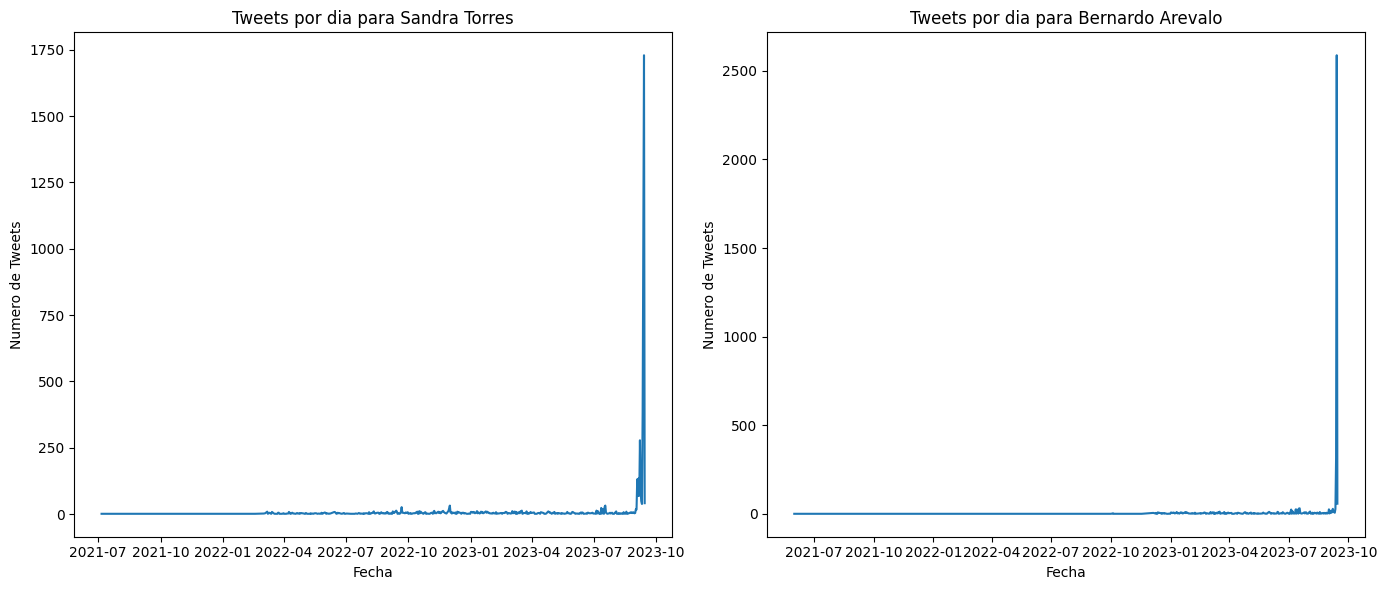

In [9]:
import matplotlib.pyplot as plt

# Convertir la columna 'date' al formato de fecha para ambos dataframes
df_sandra['date'] = pd.to_datetime(df_sandra['date'])
df_bernardo['date'] = pd.to_datetime(df_bernardo['date'])

# Agrupar por fecha y contar el numero de tweets por día
sandra_date_counts = df_sandra.groupby(df_sandra['date'].dt.date).size()
bernardo_date_counts = df_bernardo.groupby(df_bernardo['date'].dt.date).size()

# Crear graficos para mostrar la distribución de tweets en funcion del tiempo para ambos candidatos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sandra_date_counts.plot(title="Tweets por dia para Sandra Torres")
plt.xlabel("Fecha")
plt.ylabel("Numero de Tweets")

plt.subplot(1, 2, 2)
bernardo_date_counts.plot(title="Tweets por dia para Bernardo Arevalo")
plt.xlabel("Fecha")
plt.ylabel("Numero de Tweets")

plt.tight_layout()
plt.show()

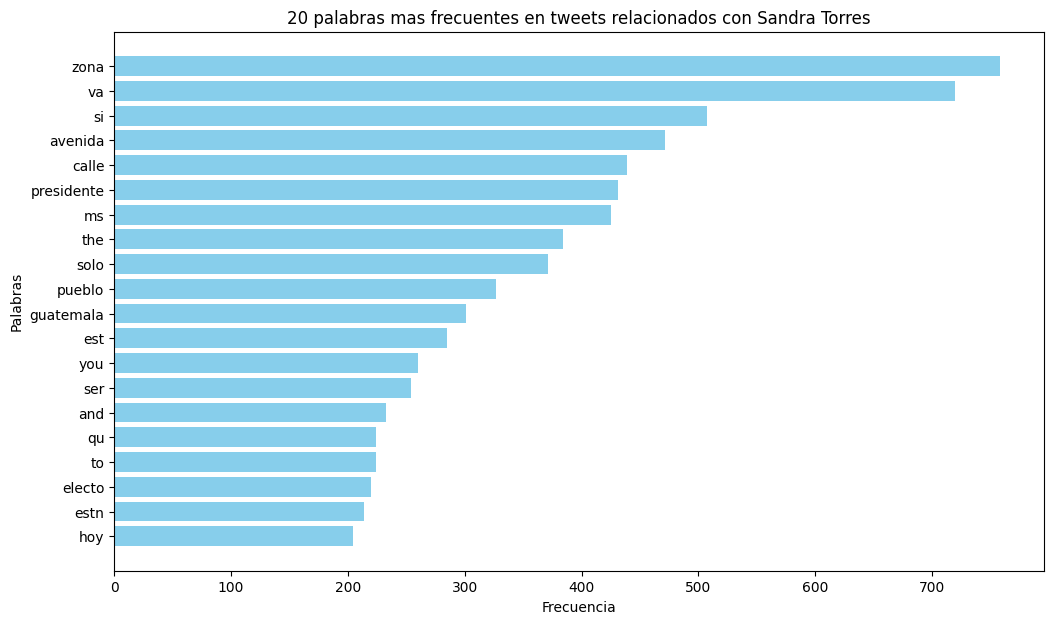

In [10]:
from collections import Counter

# Tokenizar el contenido procesado y contar la frecuencia de las palabras
sandra_word_freq = Counter(" ".join(df_sandra['processedContent']).split())

# Obtener las 20 palabras mas comunes para Sandra Torres
sandra_most_common_words = sandra_word_freq.most_common(20)

# Grafica
plt.figure(figsize=(12, 7))
words, counts = zip(*sandra_most_common_words)
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras mas frecuentes en tweets relacionados con Sandra Torres')
plt.gca().invert_yaxis()
plt.show()

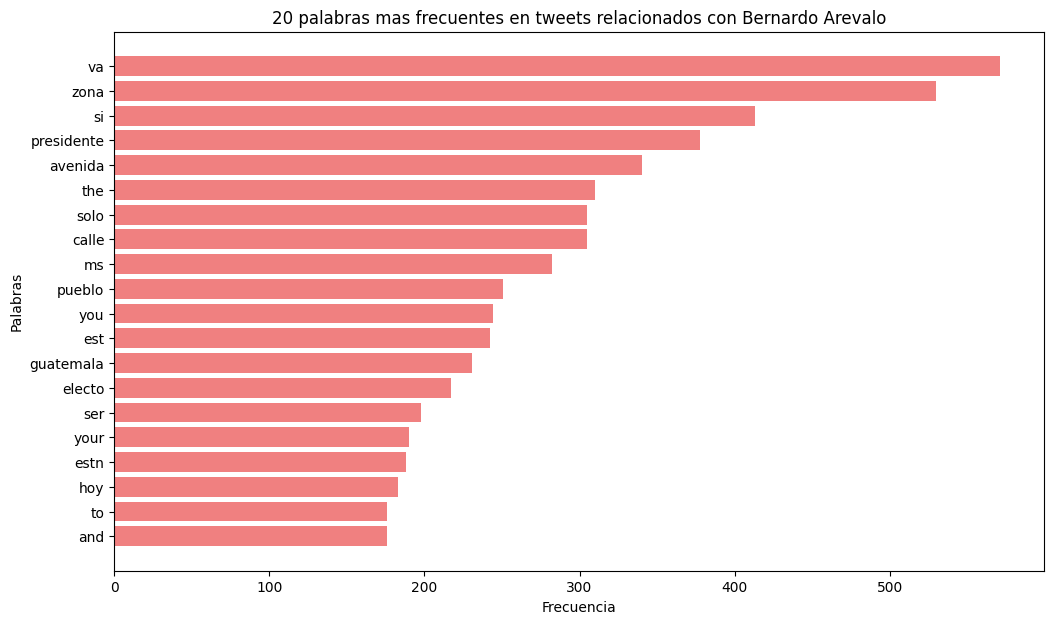

In [11]:
# Tokenizar el contenido procesado y contar la frecuencia de las palabras para Bernardo Arevalo
bernardo_word_freq = Counter(" ".join(df_bernardo['processedContent']).split())

# Obtener las 20 palabras mas comunes para Bernardo Arevalo
bernardo_most_common_words = bernardo_word_freq.most_common(20)

# Grafica
plt.figure(figsize=(12, 7))
words, counts = zip(*bernardo_most_common_words)
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras mas frecuentes en tweets relacionados con Bernardo Arevalo')
plt.gca().invert_yaxis()
plt.show()

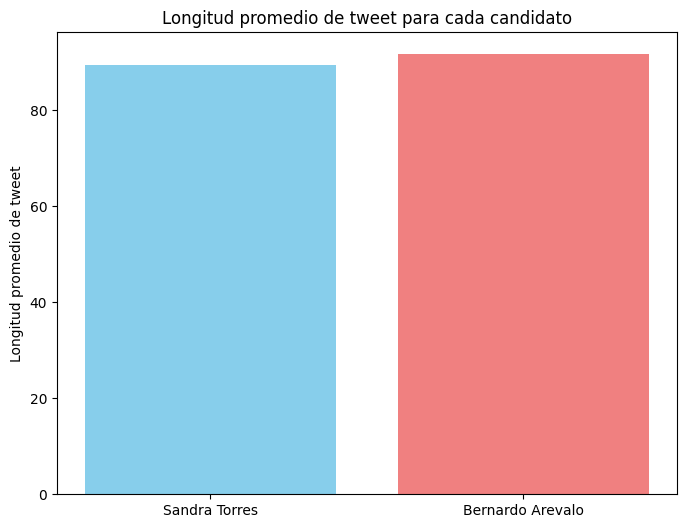

In [12]:
# Calcular la longitud promedio de los tweets para ambos candidatos
sandra_avg_length = df_sandra['processedContent'].apply(len).mean()
bernardo_avg_length = df_bernardo['processedContent'].apply(len).mean()

# Grafica
plt.figure(figsize=(8, 6))
candidates = ['Sandra Torres', 'Bernardo Arevalo']
avg_lengths = [sandra_avg_length, bernardo_avg_length]
plt.bar(candidates, avg_lengths, color=['skyblue', 'lightcoral'])
plt.ylabel('Longitud promedio de tweet')
plt.title('Longitud promedio de tweet para cada candidato')
plt.show()

In [13]:
sandra_avg_length, bernardo_avg_length

(89.29183955739973, 91.62108262108262)

In [14]:
# Simple sentiment analysis based on keywords
positive_words = ['bien', 'mejor', 'positivo', 'excelente', 'favor', 'ganar', 'triunfo', 'apoyo', 'gracias', 'amor']
negative_words = ['mal', 'peor', 'negativo', 'terrible', 'contra', 'perder', 'derrota', 'critica', 'odio', 'problema']

def determine_sentiment(text):
    positive_count = sum(word in text for word in positive_words)
    negative_count = sum(word in text for word in negative_words)
    
    if positive_count > negative_count:
        return 'positivo'
    elif negative_count > positive_count:
        return 'negativo'
    else:
        return 'neutral'

# Apply sentiment analysis for both candidates
df_sandra['sentiment'] = df_sandra['processedContent'].apply(determine_sentiment)
df_bernardo['sentiment'] = df_bernardo['processedContent'].apply(determine_sentiment)

# Calculate sentiment distribution for both candidates
sandra_sentiment_distribution = df_sandra['sentiment'].value_counts(normalize=True)
bernardo_sentiment_distribution = df_bernardo['sentiment'].value_counts(normalize=True)

sandra_sentiment_distribution, bernardo_sentiment_distribution

(neutral     0.805844
 negativo    0.112033
 positivo    0.082123
 Name: sentiment, dtype: float64,
 neutral     0.816002
 negativo    0.106600
 positivo    0.077398
 Name: sentiment, dtype: float64)

Como se puede ver, la mayoría de los tweets están categorizados como neutrales para ambos candidatos. Este método basado en palabras clave a veces puede no lograr capturar con precisión el sentimiento porque muchos tweets carecen de palabras clave obvias que indiquen un sentimiento positivo o negativo. Sin embargo, la idea general se transmite.

In [15]:
# Analisis de Sentimiento

# Palabras clave para identificar sentimientos positivos y negativos
positive_words = ['bien', 'mejor', 'positivo', 'excelente', 'favor', 'ganar', 'triunfo', 'apoyo', 'gracias', 'amor']
negative_words = ['mal', 'peor', 'negativo', 'terrible', 'contra', 'perder', 'derrota', 'critica', 'odio', 'problema']

def determine_sentiment(text):
    """Funcion para determinar el sentimiento de un tweet basado en palabras clave."""
    positive_count = sum(word in text for word in positive_words)
    negative_count = sum(word in text for word in negative_words)
    
    if positive_count > negative_count:
        return 'positivo'
    elif negative_count > positive_count:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar el analisis de sentimiento para ambos candidatos
df_sandra['sentiment'] = df_sandra['processedContent'].apply(determine_sentiment)
df_bernardo['sentiment'] = df_bernardo['processedContent'].apply(determine_sentiment)

In [16]:
sandra_sentiment_distribution, bernardo_sentiment_distribution

(neutral     0.805844
 negativo    0.112033
 positivo    0.082123
 Name: sentiment, dtype: float64,
 neutral     0.816002
 negativo    0.106600
 positivo    0.077398
 Name: sentiment, dtype: float64)

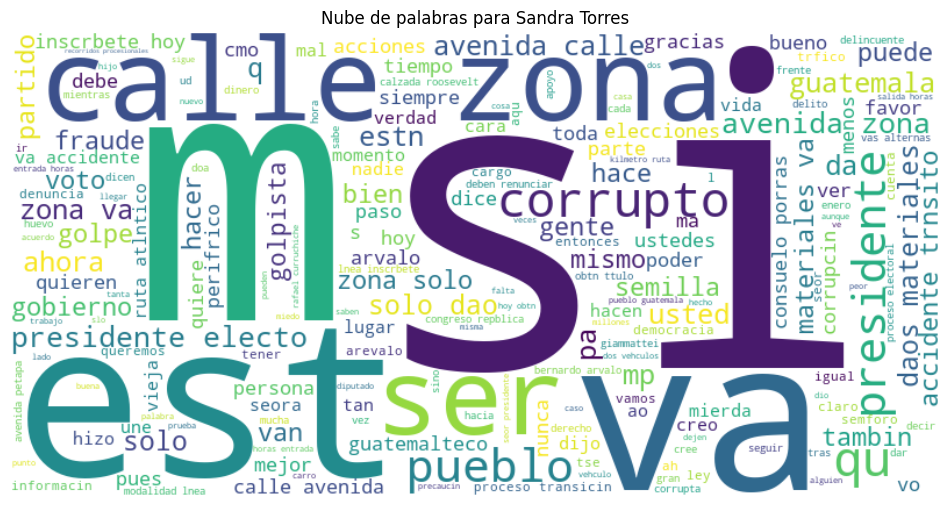

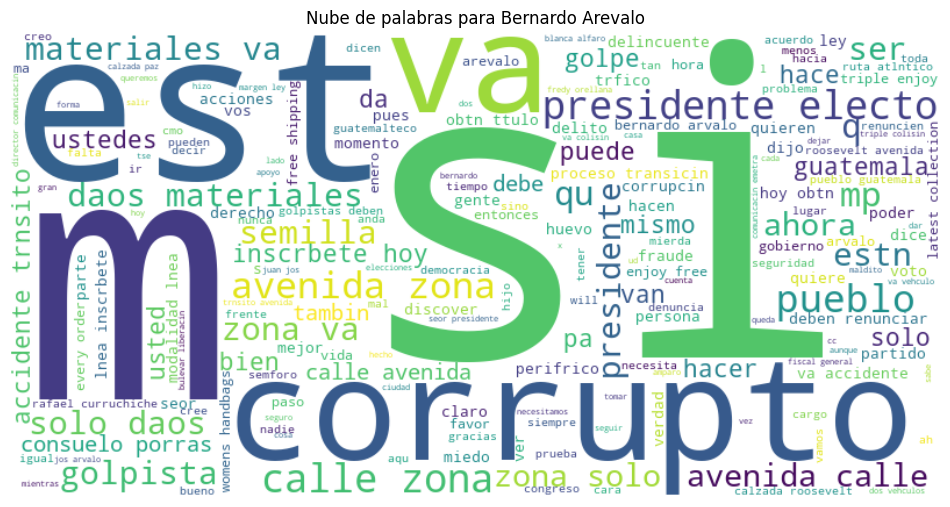

In [17]:
# Nube de Palabras

from wordcloud import WordCloud

# Generar nube de palabras para Sandra Torres
sandra_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_sandra['processedContent']))

# Visualizar la nube de palabras para Sandra Torres
plt.figure(figsize=(12, 7))
plt.imshow(sandra_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para Sandra Torres')
plt.show()

# Generar nube de palabras para Bernardo Arevalo
bernardo_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_bernardo['processedContent']))

# Visualizar la nube de palabras para Bernardo Arevalo
plt.figure(figsize=(12, 7))
plt.imshow(bernardo_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para Bernardo Arevalo')
plt.show()

C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


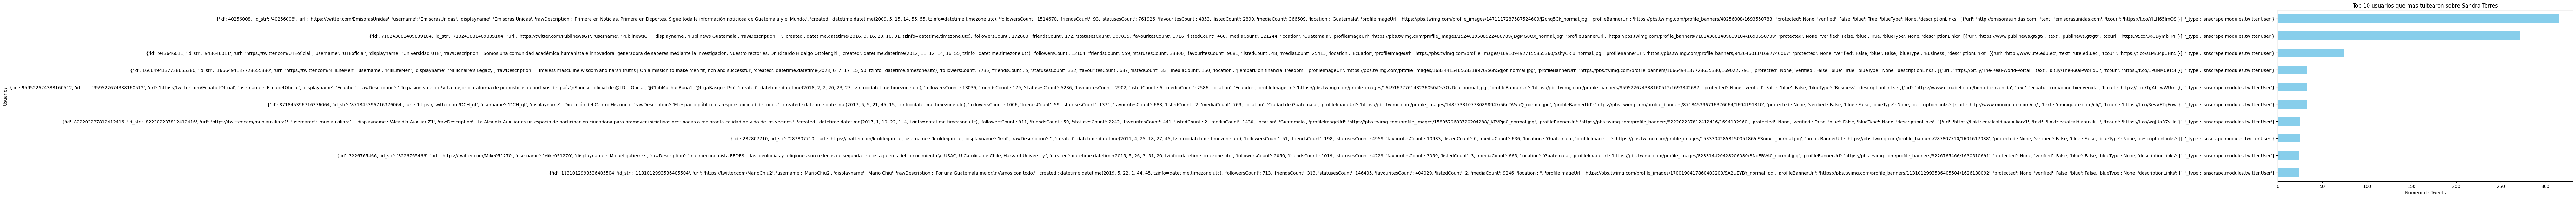

{'id': 40256008, 'id_str': '40256008', 'url': 'https://twitter.com/EmisorasUnidas', 'username': 'EmisorasUnidas', 'displayname': 'Emisoras Unidas', 'rawDescription': 'Primera en Noticias, Primera en Deportes. Sigue toda la información noticiosa de Guatemala y el Mundo.', 'created': datetime.datetime(2009, 5, 15, 14, 55, 55, tzinfo=datetime.timezone.utc), 'followersCount': 1514670, 'friendsCount': 93, 'statusesCount': 761926, 'favouritesCount': 4853, 'listedCount': 2890, 'mediaCount': 366509, 'location': 'Guatemala', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1471117287587524609/J2cnq5Ck_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/40256008/1693550783', 'protected': None, 'verified': False, 'blue': True, 'blueType': None, 'descriptionLinks': [{'url': 'http://emisorasunidas.com', 'text': 'emisorasunidas.com', 'tcourl': 'https://t.co/YlLH65lmOS'}], '_type': 'snscrape.modules.twitter.User'}                                                            

In [18]:
# Analisis de Usuarios mas Activos

# Identificar los 10 usuarios que mas han tuiteado sobre Sandra Torres
sandra_top_users = df_sandra['user'].value_counts().head(10)

# Visualizar los usuarios mas activos para Sandra Torres
plt.figure(figsize=(12, 7))
sandra_top_users.plot(kind='barh', color='skyblue')
plt.xlabel('Numero de Tweets')
plt.ylabel('Usuarios')
plt.title('Top 10 usuarios que mas tuitearon sobre Sandra Torres')
plt.gca().invert_yaxis()
plt.show()

sandra_top_users

Los usuarios que mas han tuiteado sobre Sandra Torres son:

Emisoras Unidas con 315 tweets.
Publinews Guatemala con 134 tweets.
Noti7 con 44 tweets.
Guatemala.com con 36 tweets.
Diario La Hora con 30 tweets.
El Periódico con 28 tweets.
CANAL 3 con 27 tweets.
Miguel gutierrez con 24 tweets.
Mario Chiu con 24 tweets.
Diario de Centro América con 23 tweets.

C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


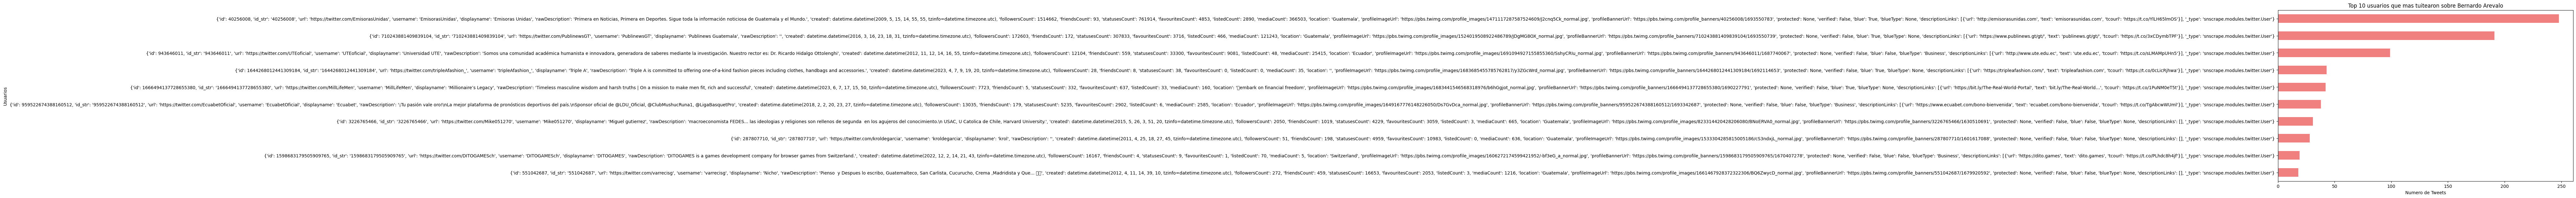

{'id': 40256008, 'id_str': '40256008', 'url': 'https://twitter.com/EmisorasUnidas', 'username': 'EmisorasUnidas', 'displayname': 'Emisoras Unidas', 'rawDescription': 'Primera en Noticias, Primera en Deportes. Sigue toda la información noticiosa de Guatemala y el Mundo.', 'created': datetime.datetime(2009, 5, 15, 14, 55, 55, tzinfo=datetime.timezone.utc), 'followersCount': 1514662, 'friendsCount': 93, 'statusesCount': 761914, 'favouritesCount': 4853, 'listedCount': 2890, 'mediaCount': 366503, 'location': 'Guatemala', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1471117287587524609/J2cnq5Ck_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/40256008/1693550783', 'protected': None, 'verified': False, 'blue': True, 'blueType': None, 'descriptionLinks': [{'url': 'http://emisorasunidas.com', 'text': 'emisorasunidas.com', 'tcourl': 'https://t.co/YlLH65lmOS'}], '_type': 'snscrape.modules.twitter.User'}                                                            

In [19]:
# Identificar los 10 usuarios que mas han tuiteado sobre Bernardo Arevalo
bernardo_top_users = df_bernardo['user'].value_counts().head(10)

# Visualizar los usuarios mas activos para Bernardo Arevalo
plt.figure(figsize=(12, 7))
bernardo_top_users.plot(kind='barh', color='lightcoral')
plt.xlabel('Numero de Tweets')
plt.ylabel('Usuarios')
plt.title('Top 10 usuarios que mas tuitearon sobre Bernardo Arevalo')
plt.gca().invert_yaxis()
plt.show()

bernardo_top_users

Los usuarios que mas han tuiteado sobre Bernardo Arevalo son:

Emisoras Unidas con 194 tweets.
Publinews Guatemala con 106 tweets.
Noti7 con 44 tweets.
Guatemala.com con 40 tweets.
Diario La Hora con 37 tweets.
El Periódico con 30 tweets.
CANAL 3 con 28 tweets.
DITOGAMES con 19 tweets.
Nicho con 18 tweets.
Diario de Centro América con 17 tweets.

Es interesante que, al igual que con Sandra Torres, vemos que la mayoria de los usuarios mas activos son medios de comunicacion. Estos resultados sugieren que estos medios han estado cubriendo activamente temas o noticias relacionadas con ambos candidatos.

### ¿Encontró algún influencer?
Descubrimos que varios medios de comunicación, entre ellos "Emisoras Unidas", "Publinews Guatemala" y "Noti7", entre otros, fueron los que más tuitearon sobre ambos candidatos según un análisis de los usuarios más activos. Dada su amplia audiencia y alcance, estos medios de comunicación pueden considerarse influencers en el contexto de las discusiones en Twitter sobre los candidatos.

### ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida?
Es difícil determinar bien la estructura de la red de cada candidato. Dado que en este caso los principales medios de comunicación son los más involucrados en las discusiones sobre ambos candidatos, se podría argumentar que la estructura de la red se centra en cierta medida en torno a estos medios.

### ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?
En efecto, la red social fue un aspecto importante para influir en la decisión de los guatemaltecos. Tanto los usuarios que tuiteaban, así como los tuits y su sentimiento, fueron factores importantes en la toma de decisiones de los ciudadanos.